In [2]:
%reset -f

In [3]:
import context

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
import hier_clust

In [6]:
import scipy.cluster.hierarchy
import sklearn.preprocessing

In [7]:
np.random.seed(1)

In [9]:
filename = "../../../2016-a-winter/cse250b-learning-algos/hw6/Animals_with_Attributes/predicate-matrix-continuous.txt"
df = np.loadtxt(filename)
print "{} rows, {} columns".format(*df.shape)

50 rows, 85 columns


In [10]:
df = sklearn.preprocessing.scale(df)

In [12]:
animals_filename = "../../../2016-a-winter/cse250b-learning-algos/hw6/Animals_with_Attributes/classes.txt"
with open(animals_filename) as f:
    animals = [line.split()[1].replace('+', ' ') for line in f]

In [13]:
n_neighbors = 20
hc = hier_clust.HierClust(n_neighbors = n_neighbors, sigma_similarity = 10)
tree, paths = hc.fit(df)

In [14]:
pairs = sorted(zip(animals, paths), key = lambda x: x[1])
for a, p in pairs:
    print "{:20s}: {}".format(a, p)

antelope            : LLLLLLL
deer                : LLLLLLR
horse               : LLLLLR
moose               : LLLLR
giraffe             : LLLRL
zebra               : LLLRR
buffalo             : LLRLLL
ox                  : LLRLLRL
pig                 : LLRLLRRL
cow                 : LLRLLRRR
sheep               : LLRLR
elephant            : LLRRL
rhinoceros          : LLRRR
blue whale          : LRLL
humpback whale      : LRLR
dolphin             : LRRLLL
seal                : LRRLLRL
otter               : LRRLLRR
killer whale        : LRRLR
hippopotamus        : LRRRL
walrus              : LRRRR
skunk               : RLLLLL
raccoon             : RLLLLR
mole                : RLLLRL
rat                 : RLLLRR
beaver              : RLLRLL
squirrel            : RLLRLR
hamster             : RLLRRLL
mouse               : RLLRRLR
rabbit              : RLLRRR
persian cat         : RLRLLLL
siamese cat         : RLRLLLR
chihuahua           : RLRLLR
dalmatian           : RLRLRL
collie        

<IPython.core.display.Javascript object>


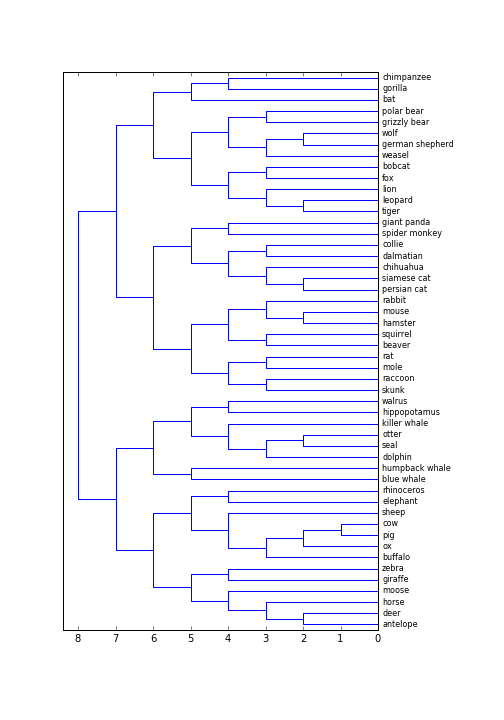

In [15]:
from hier_clust.linkage_util import get_linkage
linkage = get_linkage(tree)
plt.figure()
plt.gcf().set_size_inches(7, 10, forward = True)
_ = scipy.cluster.hierarchy.dendrogram(
    linkage, labels = animals, orientation = "left", color_threshold = 0)
plt.gcf().subplots_adjust(right = 0.75)

[[ 0.  1.  2.  2.]
 [ 2.  4.  1.  2.]
 [ 3.  6.  2.  3.]
 [ 5.  7.  3.  5.]]


<IPython.core.display.Javascript object>


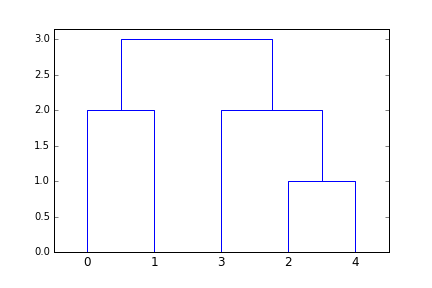

{'color_list': ['b', 'b', 'b', 'b'],
 'dcoord': [[0.0, 2.0, 2.0, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 2.0, 2.0, 1.0],
  [2.0, 3.0, 3.0, 2.0]],
 'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5]],
 'ivl': ['0', '1', '3', '2', '4'],
 'leaves': [0, 1, 3, 2, 4]}

In [16]:
from hier_clust.tree_util import Tree
tree_to_recover = Tree(data = {"orig_indices": [0, 1, 2, 3, 4]}, children = [
            Tree(data = {"orig_indices": [0, 1]}, children = [
                Tree.leaf(data = {"orig_indices": [0]}),
                Tree.leaf(data = {"orig_indices": [1]}),
            ]),
            Tree(data = {"orig_indices": [2, 3, 4]}, children = [
                Tree.leaf(data = {"orig_indices": [3]}),
                Tree(data = {"orig_indices": [2, 4]}, children = [
                    Tree.leaf(data = {"orig_indices": [1]}),
                    Tree.leaf(data = {"orig_indices": [4]}),
                ]),
            ]),
        ])
linkage = get_linkage(tree_to_recover)
print linkage
plt.figure()
scipy.cluster.hierarchy.dendrogram(linkage, color_threshold=0)